<a href="https://colab.research.google.com/github/atc857/ttest/blob/main/Aula4_Testes_Hipoteses_ttest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testes de hipóteses utilizando Python

Disciplina: Metodologia Científica 2 (Métodos Quantitativos)

por André T. Campos

O pacote `SciPy` possui ferramentas dedicadas à resolução de problemas típicos de computação científica. Nesta aula utilizaremos especificamente o módulo `stats`, que possui uma vasta gama de funcionalidades para lidar com conceitos estatísticos fundamentais. Para maiores informações sobre as funcionalidades disponíveis, consulte a documentação no link https://docs.scipy.org/doc/scipy/reference/stats.html.

![SciPy logo](https://www.fullstackpython.com/img/logos/scipy.png)

In [1]:
# Atualização da biblioteca scipy para a versão mais recente disponível.
# Google Colab já vem com a biblioteca instalada, porém, pode não ser a versão mais recente. Portanto, é recomendável atualizar.
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Importação das bibliotecas necessárias
from scipy import stats
from scipy import optimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Configuração do estilo dos gráficos
sns.set(style='ticks')

# Teste-t para uma amostra

O objetivo deste teste é verificar se a amostra sob análise provém de uma população com a média informada.

Suposições:
*   A população da qual a amostra foi extraída é normal. Essa exigência pode ser relaxada, pelo teorema central do limite, para amostras de tamanho \\( n \geq 30 \\) .
*   Se a variância da população é conhecida, utiliza-se o *teste-z*. Se a variância é desconhecida, utiliza-se o *teste-t*. Normalmente o segundo caso é o mais comum.


---

**Ex. 1)** Desejamos avaliar se uma amostra fornecida de \\(n=40\\) pneus (`X_samples`) tem média de durabilidade \\( \mu_0 = 60000 \\) quilômetros.


*   A estatística teste é dada por \\[ t = \frac{\bar{x} - \mu_0}{s / \sqrt{n} } \\]
*   Hipótese nula: \\( H_0: \mu = \mu_0 \\)
*   Hipótese alternativa: \\( H_1: \mu \neq \mu_0 \\)

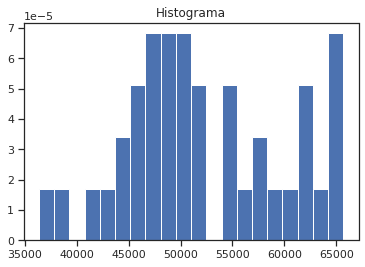

[54842.98290378 63948.99703697 65667.28781282 49941.57069188
 48235.92306356 51688.78871712 47795.19534575 54940.48880293
 44309.13576218 46760.17027281 45768.29899528 51343.87170545
 61586.1730406  48099.71012255 48751.59127488 64356.37789201
 51709.08968796 46258.34803922 60247.2208777  59342.65008664
 64823.32241831 41635.07072627 50414.52616525 54533.07480064
 65248.43247282 62083.94640561 57870.20987225 50350.63397604
 62434.71589458 45771.0964161  37966.91981127 36367.99250907
 47957.63388268 43772.64148596 43243.51634697 57137.80722626
 49290.18006654 55538.38857888 49954.43479876 47509.14613667]


In [4]:
# Gera uma amostra aleatória de n elementos a partir de população normal com média mu e desvio-padrão sigma
mu, sigma = 55000, 10000
X = stats.norm(mu, sigma)
n = 40
X_samples = X.rvs(n) 

# Plota o histograma da amostra
plt.hist(X_samples, density=True, bins=20)
plt.title('Histograma')
plt.show()

# Mostra os valores da amostra
print(X_samples)

Usando o módulo `stats`, basta chamar o comando `scipy.stats.ttest_1samp(a, popmean, alternative='two-sided')`, em que:
*   `a` é a amostra (array)
*   `popmean` é a média populacional alegada
*   `alternative` define se o teste é unilateral ('less' ou 'greater') ou bilateral ('two-sided'). Por padrão, o teste é bilateral.

A saída do comando é a estatística do teste (t) e o valor-p.

In [5]:
# A média alegada para os pneus é de 60.000 km
mu0 = 60000
# Adotando nível de significância de 5%
alpha = 0.05
# Armazena a saída do teste-t numa tupla
t, p = stats.ttest_1samp(X_samples, mu0)

# Imprime o resultado do teste
print(f'A estatística do teste foi t={t:.4f}, correspondente ao valor-p de {p:.3%}.')
# Análise do resultado do teste
if p <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância de {alpha:.1%}.')
else:
  print(f'Não há evidência suficiente para rejeitar a hipótese nula em favor da hipótese alternativa.')

A estatística do teste foi t=-6.3288, correspondente ao valor-p de 0.000%.
Hipótese nula rejeitada ao nível de significância de 5.0%.


## Análise alternativa do resultado do teste (pelo valor da estatística do teste).
![](https://www.dummies.com/wp-content/uploads/362521.image0.jpg)

In [6]:
# Graus de liberdade 
gl = n - 1
# limite inferior da região de aceitação de H0
rcinf = stats.t.ppf(alpha / 2 , gl)
# limite superior da região de aceitação de H0
rcsup = stats.t.ppf(1 - alpha / 2 , gl)
# Exibe o intervalo de aceitação
print(f'({rcinf} , {rcsup})')

(-2.0226909117347285 , 2.022690911734728)


In [7]:
# Se o valor do teste (t) bilateral cair abaixo do limite inferior ou acima do limite superior, está na região crítica
if t < rcinf or t > rcsup:
  print(f'Hipótese nula rejeitada, pois t={t:.5f} está na região crítica ao nível de significância de {alpha:.1%}.')
else:
  print(f'Não há evidência suficiente para rejeitar a hipótese nula, pois t={t:.5f} está na região de aceitação ao nível de significância de {alpha:.1%}.')

Hipótese nula rejeitada, pois t=-6.32879 está na região crítica ao nível de significância de 5.0%.


# Teste-t para duas amostras independentes

O objetivo do teste é verificar se a diferença entre médias de duas amostras provém de populações com médias diferentes ou não.

Suposições:
*   As duas amostras provém de populações com distribuição normal. Essa exigência pode ser relaxada, pelo teorema central do limite, para amostras de tamanho \\( n_1 + n_2 - 2 \geq 30 \\) .
*   As variâncias das populações devem ser aproximadamente iguais. Grosso modo, se a razão entre as variâncias for de até 4x, podemos adotar variâncias iguais.
*   As amostras são oriundas de dois grupos diferentes (independentes).

---

**Ex. 2)** Sejam dois métodos de ensino, A e B. Uma escola separou os alunos em dois grupos e adotou um método para cada grupo. Ao final, aplicou a mesma prova a todos os alunos, obtendo dois conjuntos de notas, conforme mostrado a seguir. Deseja-se aferir se há diferença de rendimento entre os métodos aplicados, ao nível de siginificância de 10%.

*   A estatística teste é dada por \\[ t = \frac{\bar{x}_1 - \bar{x}_2}{s_a \cdot \sqrt{\frac{1}{n_1}+\frac{1}{n_2}} } \\]
*   Hipótese nula: \\( H_0: \mu_1 = \mu_2 \\)
*   Hipótese alternativa: \\( H_1: \mu_1 \neq \mu_2 \\)

In [8]:
# Amostragem de n elementos a partir de duas distribuições normais com médias mu1 e mu2 e desvio-padrão sigma
n = 25
ppre, ppos = np.random.rand(2,11) # array 2x11 com probabilidades para as notas A e B
ppre = ppre / np.sum(ppre) # forçando a soma das probabilidades dar 1
ppos = ppos / np.sum(ppos)
X1_sample = np.random.choice(11,n,p=ppre) # notas do grupo 1 escolhidas aleatoriamente entre 0 e 10
X2_sample = np.random.choice(11,n,p=ppos)

# médias amostrais
mu1 = np.mean(X1_sample)
mu2 = np.mean(X2_sample)
print(f'médias: {mu1} , {mu2}')

médias: 5.16 , 4.4


In [9]:
# Mostra os valores das amostras
print('Notas do grupo A')
print(X1_sample)
print('Notas do grupo B')
print(X2_sample)

Notas do grupo A
[ 6  3  3 10 10  4 10  9  1 10  6  0  6  3  3 10  4  1  4  3  1  0 10  6
  6]
Notas do grupo B
[ 4  6  1  1  5  2  6  7  4  3  9  2  0  1  4  5  0  2  9  5  2  9  4  9
 10]


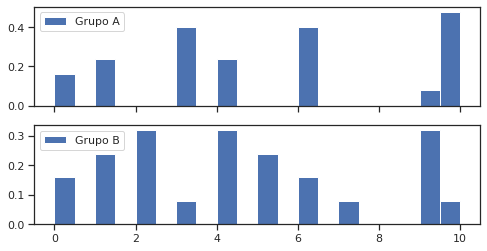

In [10]:
# histograma das amostras
fig, ax = plt.subplots(2, 1, figsize=(8, 4),sharex=True)
ax[0].hist(X1_sample, label="Grupo A", density=True, bins=20)
ax[0].legend()

ax[1].hist(X2_sample, label="Grupo B", density=True, bins=20)
ax[1].legend()

plt.show()

Usando o módulo `stats`, basta chamar o comando `scipy.stats.ttest_ind(a, b, equal_var=True, alternative='two-sided')`, em que:
*   `a , b` são as amostras para comparar (array)
*   `equal_var=True` o padrão `True` assume variâncias iguais e realiza teste-t padrão; se `False`, realiza teste-t de Welch, que não assume variâncias iguais.
*   `alternative` define se o teste é unilateral ('less' ou 'greater') ou bilateral ('two-sided'). Por padrão, o teste é bilateral.

A saída do comando é a estatística do teste (t) e o valor-p.

In [11]:
# Antes de aplicar o teste é preciso avaliar se as variâncias são iguais ou não:
print(f'variâncias: {np.var(X1_sample)} , {np.var(X2_sample)}')
if np.var(X1_sample)>np.var(X2_sample):
  ratio = np.var(X1_sample) / np.var(X2_sample)
else:
  ratio = np.var(X2_sample) / np.var(X1_sample)

# grosso modo, se a razão entre as variâncias for até 4x, podemos adotar variâncias iguais
print(f'proporção entre as variâncias = {ratio:.1f}')

variâncias: 11.6544 , 9.12
proporção entre as variâncias = 1.3


In [12]:
# aplicando o teste
t, p = stats.ttest_ind(X1_sample, X2_sample)
# nível de significância
alpha = 0.10
# Imprime o resultado do teste
print(f'A estatística do teste foi t={t:.4f}, correspondente ao valor-p de {p:.3%}.')
if p <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância de {alpha:.1%}.')
else:
  print(f'Não há evidência suficiente para rejeitar a hipótese nula em favor da hipótese alternativa.')

A estatística do teste foi t=0.8169, correspondente ao valor-p de 41.804%.
Não há evidência suficiente para rejeitar a hipótese nula em favor da hipótese alternativa.


## Análise alternativa do resultado do teste (pelo valor da estatística do teste).
![](https://www.dummies.com/wp-content/uploads/362521.image0.jpg)

In [13]:
# Graus de liberdade 
gl = n - 1
# limite inferior da região de aceitação de H0
rcinf = stats.t.ppf(alpha / 2 , gl)
# limite superior da região de aceitação de H0
rcsup = stats.t.ppf(1 - alpha / 2 , gl)
# Exibe o intervalo de aceitação
print(f'({rcinf} , {rcsup})')

(-1.7108820799094282 , 1.7108820799094275)


In [14]:
# Se o valor do teste (t) bilateral cair abaixo do limite inferior ou acima do limite superior, está na região crítica
if t < rcinf or t > rcsup:
  print(f'Hipótese nula rejeitada, pois t={t:.4f} está na região crítica ao nível de significância de {alpha:.1%}.')
else:
  print(f'Não há evidência suficiente para rejeitar a hipótese nula, pois t={t:.4f} está na região de aceitação ao nível de significância de {alpha:.1%}.')

Não há evidência suficiente para rejeitar a hipótese nula, pois t=0.8169 está na região de aceitação ao nível de significância de 10.0%.


# Teste-t para duas amostras pareadas

Verificar se a diferença entre médias de duas amostras provém de populações com médias diferentes ou não.

Suposições:
*   As duas amostras provém de populações com distribuição normal. Essa exigência pode ser relaxada, pelo teorema central do limite, para amostras de tamanho \\( n_1 + n_2 - 2 \geq 30 \\) .
*   As variâncias das populações devem ser aproximadamente iguais. Grosso modo, se a razão entre as variâncias for de até 4x, podemos adotar variâncias iguais.
*   As amostras são oriundas do mesmo grupo em momentos diferentes.

---

**Ex. 3)** Uma escola resolveu adotar um método de ensino novo aos seus  alunos. Então, aplicou uma prova antes de aplicar o método. Ao final, aplicou a mesma prova aos alunos, obtendo dois conjuntos de notas, conforme mostrado a seguir. Deseja-se aferir se o novo método de ensino fez diferença no  rendimento dos alunos, ao nível de siginificância de 10%.

*   A estatística teste é dada por \\[ t = \frac{\bar{x}_1 - \bar{x}_2}{s_a \cdot \sqrt{\frac{1}{n_1}+\frac{1}{n_2}} } \\]
*   Hipótese nula: \\( H_0: \mu_1 = \mu_2 \\)
*   Hipótese alternativa: \\( H_1: \mu_1 \neq \mu_2 \\)

In [15]:
# Teste-t para duas amostras
n = 100 # n elementos na amostra
ppre, ppos = np.random.rand(2,11) # array 2x11 com probabilidades para as notas antes e depois
ppre = ppre / np.sum(ppre) # forçando a soma das probabilidades dar 1
ppos = ppos / np.sum(ppos)
X1_sample = np.random.choice(11,n,p=ppre) # notas do grupo 1 escolhidas aleatoriamente entre 0 e 10
X2_sample = np.random.choice(11,n,p=ppos)

# médias amostrais
mu1 = np.mean(X1_sample)
mu2 = np.mean(X2_sample)
print(f'médias: {mu1} , {mu2}')

médias: 4.68 , 5.88


In [16]:
# Mostra os valores das amostras
print('Notas Antes')
print(X1_sample)
print('Notas do Depois')
print(X2_sample)

Notas Antes
[10  3  8  1  5  0  0  7  2  9  7  9  0  7  2 10  7  5  3  0  9  1  0  3
  1  5  7  2  6  5  2  5  6  2  5  2  1  9  3  2  1 10  2  5  1  9  7  3
  9  7  5  9  5  9  3  1 10  2 10  6  2  2  2  3  3  9  7  0  0  5  9  0
 10  6  0  7  9  5  5  5  0  7  1  1  7  2 10  6  9  7  1  2  1  6  7  2
 10  7  1  7]
Notas do Depois
[ 0 10  3  9  8  6  0 10  6  9  7  9  1  6  7  7 10  1  7  8  9  6  4  3
 10 10  9  3  2 10  8  9  6  9 10  0  9 10  1  9  3  6  0  9  9 10  6 10
  5  3  5  9  7  9  6  0  3 10  2  9 10  5  8  4  7  0  4  2  9  0  4  7
  6  7  8  6  0  9  9  1  0  1  9  6  6  8  3  3  7  3  4  7 10  3  0  3
  6  7  7  7]


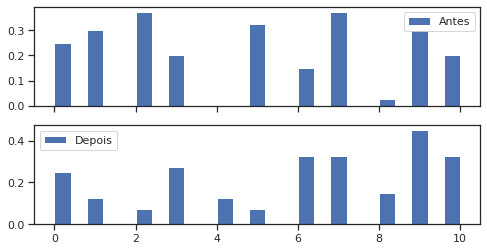

In [17]:
# gráfico das distribuições
fig, ax = plt.subplots(2, 1, figsize=(8, 4),sharex=True)
ax[0].hist(X1_sample, label="Antes", density=True, bins=25)
ax[0].legend()

ax[1].hist(X2_sample, label="Depois", density=True, bins=25)
ax[1].legend()

plt.show()

Usando o módulo `stats`, basta chamar o comando `scipy.stats.ttest_rel(a, b, equal_var=True, alternative='two-sided')`, em que:
*   `a , b` são as amostras para comparar (array)
*   `equal_var=True` o padrão `True` assume variâncias iguais e realiza teste-t padrão; se `False`, realiza teste-t de Welch, que não assume variâncias iguais.
*   `alternative` define se o teste é unilateral ('less' ou 'greater') ou bilateral ('two-sided'). Por padrão, o teste é bilateral.

A saída do comando é a estatística do teste (t) e o valor-p.

In [18]:
# Antes de aplicar o teste é preciso avaliar se as variâncias são iguais ou não:
print(f'variâncias: {np.var(X1_sample)} , {np.var(X2_sample)}')
if np.var(X1_sample)>np.var(X2_sample):
  ratio = np.var(X1_sample) / np.var(X2_sample)
else:
  ratio = np.var(X2_sample) / np.var(X1_sample)

# grosso modo, se a razão entre as variâncias for até 4x, podemos adotar variâncias iguais
print(f'proporção entre as variâncias = {ratio:.1f}')

variâncias: 10.6576 , 10.605600000000003
proporção entre as variâncias = 1.0


In [19]:
# aplicando o teste
t, p = stats.ttest_rel(X1_sample, X2_sample)
# nível de significância
alpha = 0.10
# Imprime o resultado do teste
print(f'A estatística do teste foi t={t:.4f}, correspondente ao valor-p de {p:.3%}.')
if p <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância de {alpha:.1%}.')
else:
  print(f'Não há evidência suficiente para rejeitar a hipótese nula em favor da hipótese alternativa.')

A estatística do teste foi t=-2.5398, correspondente ao valor-p de 1.265%.
Hipótese nula rejeitada ao nível de significância de 10.0%.


## Análise alternativa do resultado do teste (pelo valor da estatística do teste).
![](https://www.dummies.com/wp-content/uploads/362521.image0.jpg)

In [20]:
# Graus de liberdade 
gl = n - 1
# limite inferior da região de aceitação de H0
rcinf = stats.t.ppf(alpha / 2 , gl)
# limite superior da região de aceitação de H0
rcsup = stats.t.ppf(1 - alpha / 2 , gl)
# Exibe o intervalo de aceitação
print(f'({rcinf} , {rcsup})')

(-1.6603911559963902 , 1.6603911559963895)


In [21]:
# Se o valor do teste (t) bilateral cair abaixo do limite inferior ou acima do limite superior, está na região crítica
if t < rcinf or t > rcsup:
  print(f'Hipótese nula rejeitada, pois t={t:.4f} está na região crítica ao nível de significância de {alpha:.1%}.')
else:
  print(f'Não há evidência suficiente para rejeitar a hipótese nula, pois t={t:.4f} está na região de aceitação ao nível de significância de {alpha:.1%}.')

Hipótese nula rejeitada, pois t=-2.5398 está na região crítica ao nível de significância de 10.0%.


# Bônus

**Pingouin** é um pacote estatístico de código aberto escrito em Python 3 relativamente novo. Ele foi desenvolvido para usuários que desejam funções de estatísticas simples, mas exaustivas.

Por exemplo, o `ttest_ind` da biblioteca SciPy retorna apenas o valor T e o valor p. Por outro lado, a função `ttest` de Pingouin retorna o valor T, o valor p, os graus de liberdade, o tamanho do efeito (d de Cohen), os intervalos de confiança de 95% da diferença nas médias, o poder estatístico e o fator de Bayes (BF10) do teste.

A documentação do pacote pode ser consultada em https://pingouin-stats.org/build/html/index.html

![](https://pingouin-stats.org/build/html/_images/logo_pingouin.png)

In [22]:
# Instalação do pacote
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
# Importação da biblioteca
import pingouin as pg

## Comando para aplicação do teste t com **pingouin**

`pingouin.ttest(x, y, paired=False, alternative='two-sided', correction='auto', r=0.707, confidence=0.95)`

Em que:
*   `x,y` são os dados amostrais. Para realizar o teste t de uma amostra, basta informar a média populacional no lugar de y.
*   `paired` False para teste de amostras independentes (padrão) e True para amostras pareadas.
*   `alternative` two-sided para testes bilaterais e greater ou less para testes unilaterais.
*   `confidence` é o nível de confiança, por padrão 95%. Ou seja, é o complemento do nível de significância.


In [24]:
# Aplicação do teste t para duas amostras independentes
pg.ttest(X1_sample, X2_sample)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.589313,198,two-sided,0.010331,"[-2.11, -0.29]",0.366184,3.432,0.73131
